# Project Report - Group 108

### Introduction

For our project we will analyze player stats for the Top 500 tennis players. Tennis is a racket sport played on courts everywhere. Some major tournaments include Wimbledon, US Open, Australian Open, and French Open. Our dataset contains a variety of information including the player’s age, handedness, name, height, seasons, etc.

In this project, we aim to answer the following question:

> **Can you predict a tennis player's career earnings based on their profile?**


### Preliminary Data Analysis

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(dplyr)
library(knitr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
tennis <- read_csv(url)
head(tennis, n=8)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


For our analysis, the columns of interest are: 

1. Age
2. Best Rank 
3. Current Rank
4. Seasons Played
5. Prize Money

The first four are predictors and prize money is the target variable. These variables were selected because they have a substantial amount of observations compared to other variables which contained mostly empty cells.

To tidy the data, we isolated the five variables and removed empty observations.

In [3]:
colnames(tennis) <- make.names(colnames(tennis))
tennis <- tennis |>
    select(Age,  Current.Rank, Best.Rank, Prize.Money, Seasons)|>
    separate(col = Age,
             into= c("age", "Date"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Current.Rank,
             into= c("current_rank", "date_of_rank"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Best.Rank,
             into= c("best_rank", "date_or_best_rank"),
             sep = " ",
            convert = TRUE) |>
    select(age, current_rank, best_rank, Prize.Money, Seasons)
head(tennis, n= 8)

age,current_rank,best_rank,Prize.Money,Seasons
<int>,<int>,<int>,<chr>,<dbl>
26,378,363,NA,NA
18,326,316,"$59,040",NA
32,178,44,"US$3,261,567",14
21,236,130,"$374,093",2
27,183,17,"US$6,091,971",11
22,31,31,"$1,517,157",5
28,307,213,"$278,709",1
21,232,229,"$59,123",1


In [4]:
tennis$Prize.Money <- gsub("US", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("all-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("11th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("10th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("14th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("27th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("15th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("30th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("All-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("4th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("28th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("2nd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("6th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("33rd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("26th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("48th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("41st", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("\\$","", tennis$Prize.Money)
tennis$Prize.Money <- sub(" ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("   ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("  ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub(" all-time in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub(",", "", tennis$Prize.Money)

tennis <- tennis |>
        rename(seasons_played = Seasons)

tennis <- tennis |>
    mutate(prize_money = as.numeric(Prize.Money)) |>
    select(age, current_rank, best_rank, seasons_played, prize_money) |>
    na.omit()
head(tennis, n = 8)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,current_rank,best_rank,seasons_played,prize_money
<int>,<int>,<int>,<dbl>,<dbl>
32,178,44,14,3261567
21,236,130,2,374093
27,183,17,11,6091971
22,31,31,5,1517157
28,307,213,1,278709
21,232,229,1,59123
25,417,253,5,122734
20,104,104,3,74927


Splitting the data into training (75 %) the testing (25 %) datasets. We will set the seed to 108 so that the split performed in this project will be reproducible.

In [5]:
set.seed(108)

tennis_split <- initial_split(tennis, prop = .75, strata = prize_money)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

In [32]:
tennis_summary_mean <- tennis_train |>
    map_df(mean)
tennis_summary_max <- tennis_train |>
    map_df(max)
tennis_summary_min <- tennis_train |>
    map_df(min)
tennis_summary_med <- tennis_train |>
    map_df(median)

kable(tennis_summary_mean, format = "simple", padding = 2,
      caption = "Table 1.1 : The mean of each variable in the training data")

kable(tennis_summary_med, format = "simple", padding = 2,
      caption = "Table 1.2 : The median of each variable in the training data")


kable(tennis_summary_max, format = "simple", padding = 2,
      caption = "Table 1.3 : The maximum value of each variable in the training data") 


kable(tennis_summary_min, format = "simple", padding = 2,
      caption = "Table 1.1 : The minimum value of each variable in the training data")



Table: Table 1.1 : The mean of each variable in the training data

       age    current_rank    best_rank    seasons_played    prize_money
----------  --------------  -----------  ----------------  -------------
  26.79121        203.4139     126.5421          6.589744        4419518



Table: Table 1.2 : The median of each variable in the training data

  age    current_rank    best_rank    seasons_played    prize_money
-----  --------------  -----------  ----------------  -------------
   26             179           98                 5         650117



Table: Table 1.3 : The maximum value of each variable in the training data

  age    current_rank    best_rank    seasons_played    prize_money
-----  --------------  -----------  ----------------  -------------
   40             499          488                22      181254572



Table: Table 1.1 : The minimum value of each variable in the training data

  age    current_rank    best_rank    seasons_played    prize_money
-----  --------------  -----------  ----------------  -------------
   18               2            1                 1           2893

The predictors have different ranges, therefore they must be standardized in the model. For Best Rank and Prize Money, the mean is much greater than the median, indicating possible outliers that are increasing the average.

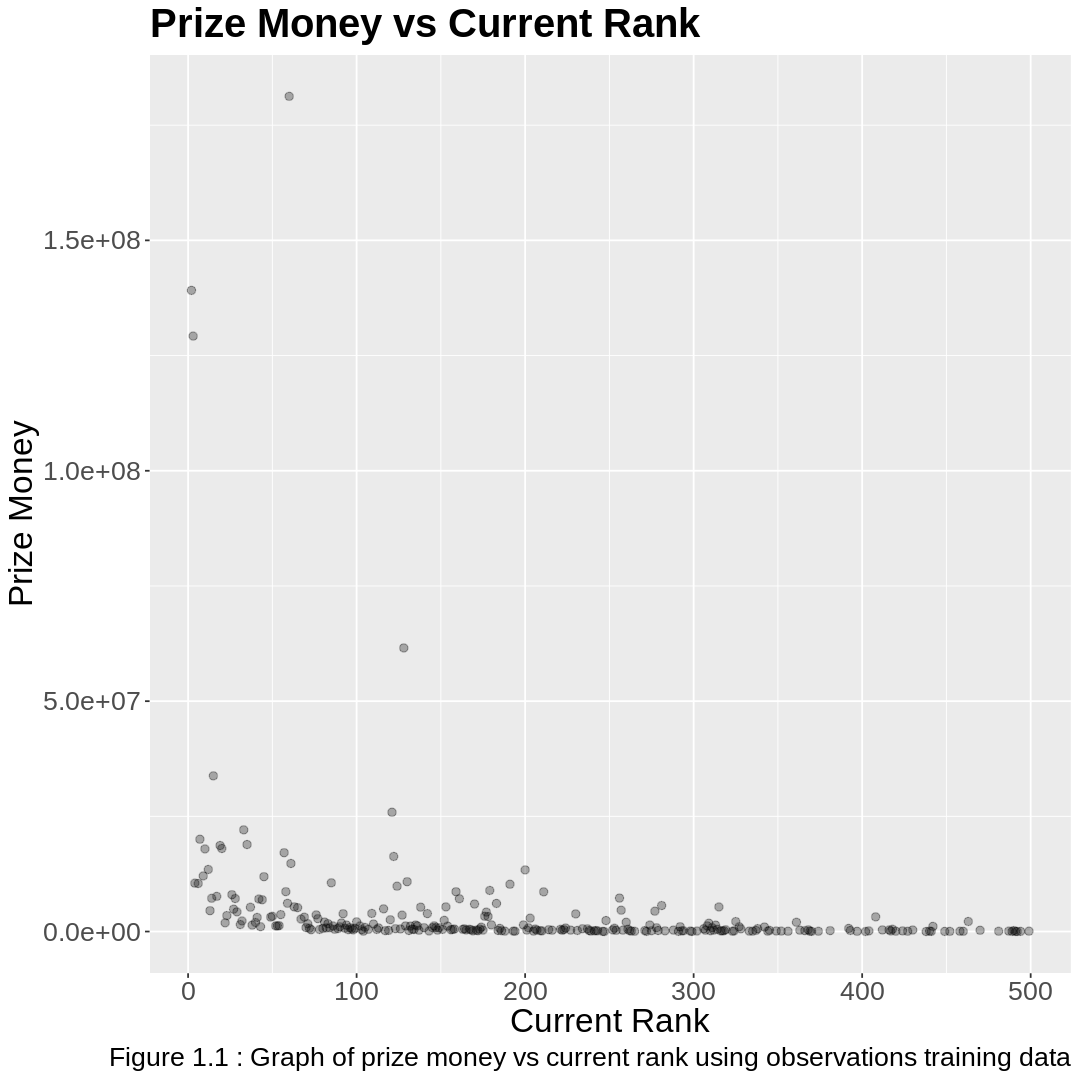

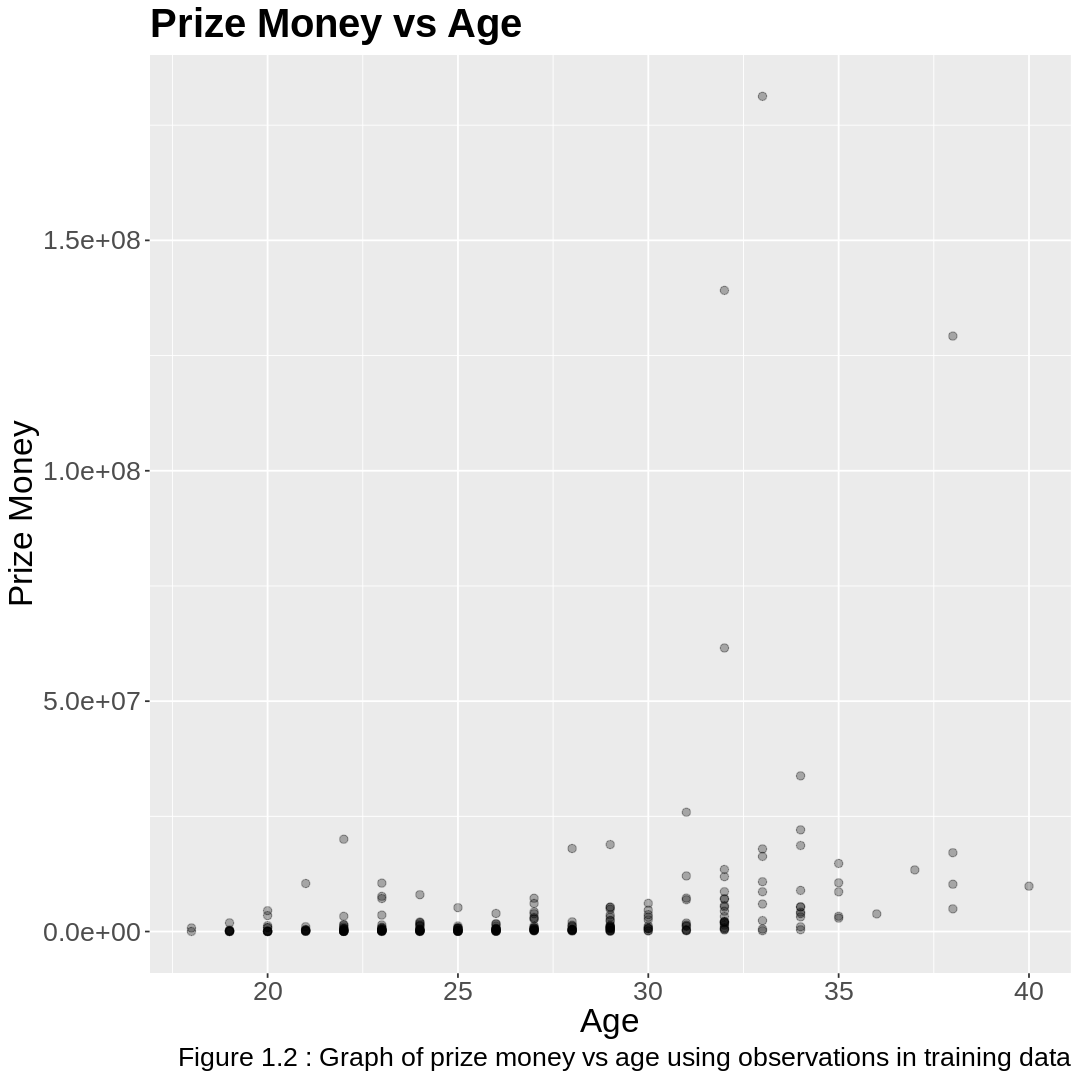

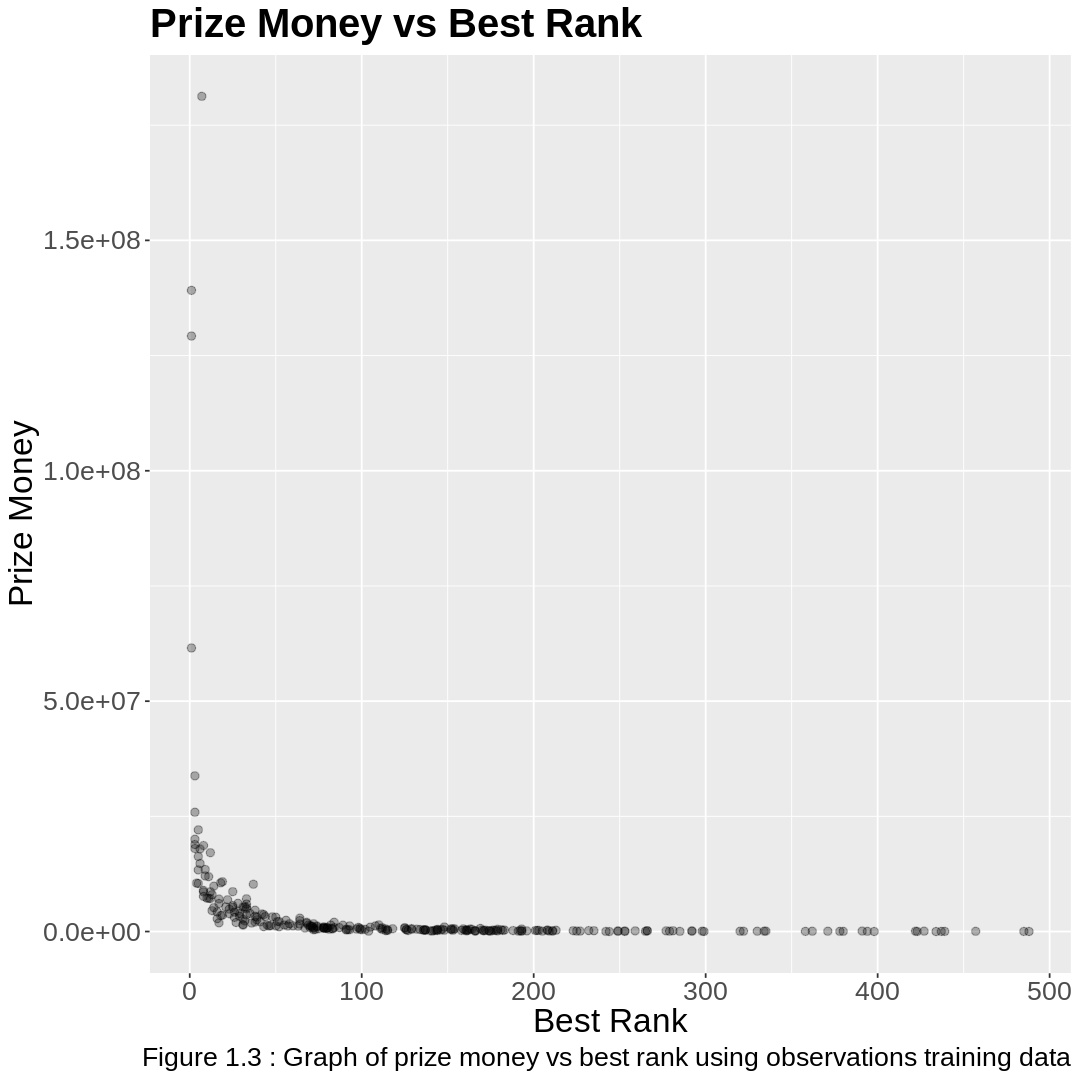

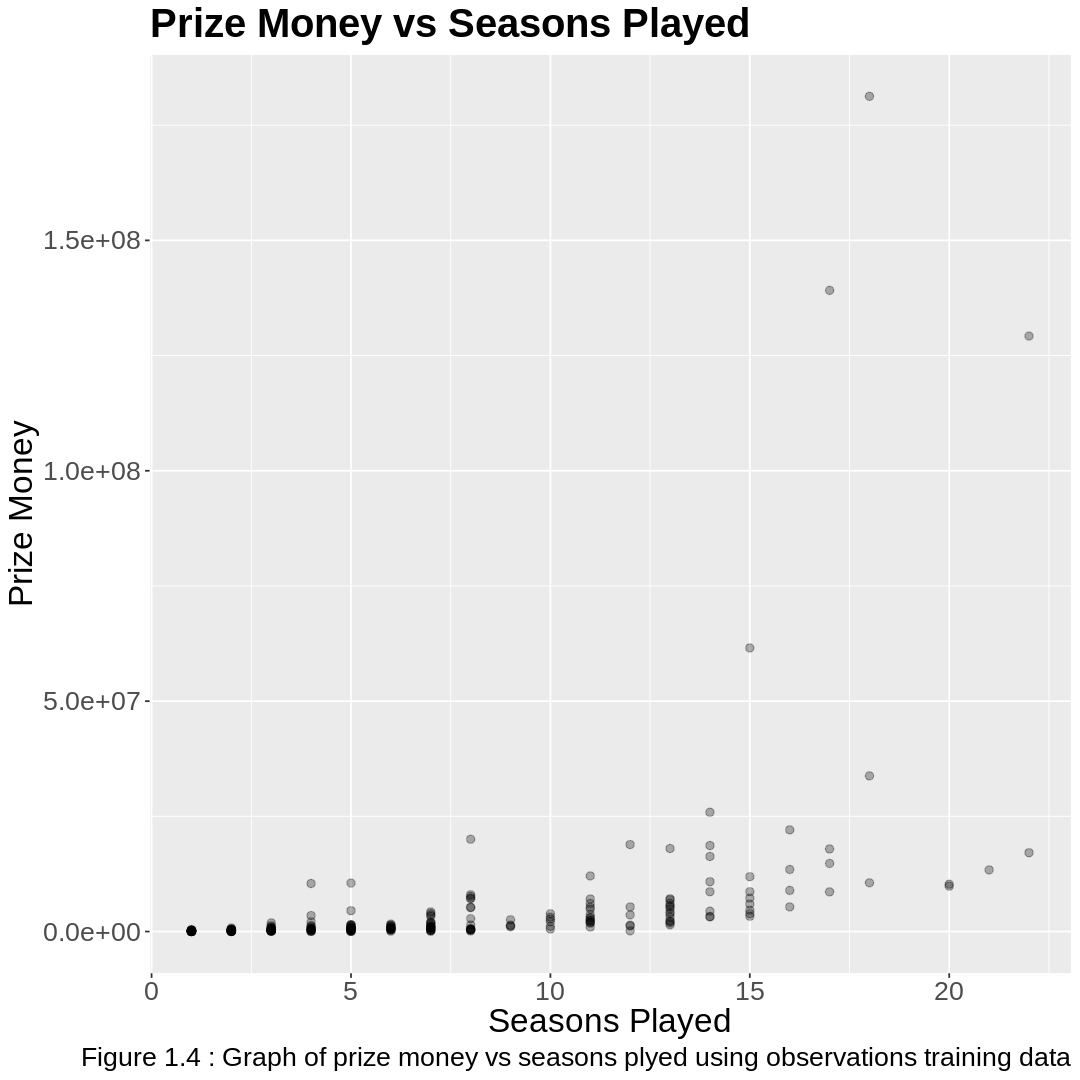

In [53]:
options(repr.plot.width = 9, repr.plot.height = 9)

ggplot(tennis_train, aes(x=current_rank,y=prize_money))+
    geom_point(alpha = 0.3, size = 2) +
    labs(title = "Prize Money vs Current Rank", x="Current Rank", y = "Prize Money", 
        caption = "Figure 1.1 : Graph of prize money vs current rank using observations training data") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

ggplot(tennis_train, aes(x=age,y=prize_money))+
    geom_point(alpha = 0.3, size = 2)+
    labs(title = "Prize Money vs Age", x="Age", y = "Prize Money",
        caption = "Figure 1.2 : Graph of prize money vs age using observations in training data") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

ggplot(tennis_train, aes(x=best_rank,y=prize_money))+
    geom_point(alpha = 0.3, size = 2)+
    labs(title = "Prize Money vs Best Rank", x="Best Rank", y = "Prize Money",
        caption = "Figure 1.3 : Graph of prize money vs best rank using observations training data") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

ggplot(tennis_train, aes(x=seasons_played,y=prize_money))+
    geom_point(alpha = 0.3, size = 2)+
    labs(title = "Prize Money vs Seasons Played", x="Seasons Played", y = "Prize Money",
        caption = "Figure 1.4 : Graph of prize money vs seasons plyed using observations training data") +
    theme(text = element_text(size = 20),
         plot.title = element_text(face = "bold"))

Age and Seasons Played have a positive, exponential relationship with Prize Money, while Best and Current Rank have a negative, exponential decay relationship. Furthermore, all plots display four outliers with lots of Prize Money.

### Methods

Since the selected variables are quantitative, we will utilize the K-nearest neighbors regression to analyze the data. All predictors will be standardized and the number of neighbors used will correspond with the smallest estimated error from a five fold cross validation on the training set. The retrained model with the optimal parameter value will be evaluated by calculating its standard error on the testing set. Moreover, each predictor will undergo this process individually to determine whether adding more predictors is beneficial.

Scatter plots with Prize money on the y-axis and a predictor on the x-axis will be used to visualize the results. Each predictor will be plotted separately with a coloured line that represents the predicted prize money from the model with that predictor only.

### Expected Outcomes

We expect older, more experienced (i.e more seasons) players to have a better rank which leads to higher career earnings. This is because experience is integral for winning, thus more experienced players will have a higher chance of winning tournaments and earning more prize money. Moreover, playing for longer allows for more time to accumulate earnings.

We will create a model that accurately predicts future tennis players’ prize money based on their projected seasons played, best rank and retirement age. This model would be beneficial for future tennis players to visualize and understand their future goals for their tennis career.

> What other variables affect career earnings in tennis?

> How does tennis’s prize money model compare with other sports' prize money model?

### References

"Player Stats for Top 500 Players" was provided on UBC Canvas from https://www.ultimatetennisstatistics.com/
> Accessed from: https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS